# 회귀로 몸무게 예측하기
* 주어진 데이터를 바탕으로 펭귄 몸무게 예측하기

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline

# 데이터 불러오기

In [2]:
# csv 형식으로 된 데이터 파일을 읽어옵니다.
df_train= pd.read_csv('dataset/train.csv')
df_test= pd.read_csv('dataset/test.csv')

# 데이터의 최상단 5 줄을 표시합니다.
df_train.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [3]:
df_train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


count row에서 몇몇 feature가 손실된 것을 확인할 수 있습니다.

# 결츨지 확인

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_num = sum(dataframe[col].isna())
        is_missing = True if missing_num >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_num}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
            # print(missing_col)
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

In [5]:
missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [6]:
for col in df_train.columns:
    msg = 'column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:                   id	 Percent of NaN value: 0.00%
column:              Species	 Percent of NaN value: 0.00%
column:               Island	 Percent of NaN value: 0.00%
column:    Clutch Completion	 Percent of NaN value: 0.00%
column:   Culmen Length (mm)	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm)	 Percent of NaN value: 0.00%
column:  Flipper Length (mm)	 Percent of NaN value: 0.00%
column:                  Sex	 Percent of NaN value: 2.63%
column:    Delta 15 N (o/oo)	 Percent of NaN value: 2.63%
column:    Delta 13 C (o/oo)	 Percent of NaN value: 2.63%
column:        Body Mass (g)	 Percent of NaN value: 0.00%


Sex, Delta 15 N (o/oo), Delta 13 C (o/oo) 에서 값이 비어있는 것을 확인할 수 있습니다.

In [7]:
missing_col = check_missing_col(df_test)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


In [8]:
for col in df_test.columns:
    msg = 'column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:                   id	 Percent of NaN value: 0.00%
column:              Species	 Percent of NaN value: 0.00%
column:               Island	 Percent of NaN value: 0.00%
column:    Clutch Completion	 Percent of NaN value: 0.00%
column:   Culmen Length (mm)	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm)	 Percent of NaN value: 0.00%
column:  Flipper Length (mm)	 Percent of NaN value: 0.00%
column:                  Sex	 Percent of NaN value: 2.63%
column:    Delta 15 N (o/oo)	 Percent of NaN value: 3.95%
column:    Delta 13 C (o/oo)	 Percent of NaN value: 3.51%


test set에서도 동일하게 확인을 해준 후, 이후에 train set과 동일하게 비어있는 데이터를 채워줘야 합니다.

## 다양한 feature와 Body Mass의 관계를 불러옵니다.

In [9]:
df_train[['Species', 'Body Mass (g)']].groupby(['Species'], as_index=True).mean()

,Body Mass (g)
Species,
Adelie Penguin (Pygoscelis adeliae),3801.219512
Chinstrap penguin (Pygoscelis antarctica),3756.000000
Gentoo penguin (Pygoscelis papua),5075.520833


In [10]:
df_train[['Island', 'Body Mass (g)']].groupby(['Island'], as_index=True).mean()

,Body Mass (g)
Island,
Biscoe,4878.947368
Dream,3764.772727
Torgersen,3817.307692


In [11]:
df_train[['Clutch Completion', 'Body Mass (g)']].groupby(['Clutch Completion'], as_index=True).mean()

,Body Mass (g)
Clutch Completion,
No,4116.666667
Yes,4352.696078


In [12]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean()

,Body Mass (g)
Culmen Length (mm),
33.5,3600.0
34.0,3400.0
34.1,3475.0
35.3,3800.0
35.5,3350.0
...,...
52.8,4550.0
53.4,5500.0
53.5,4500.0


In [13]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean()

,Body Mass (g)
Culmen Depth (mm),
13.2,4500.000000
13.3,5100.000000
13.5,4150.000000
13.9,4900.000000
14.0,4575.000000
14.1,4412.500000
14.2,4750.000000
14.4,4525.000000
14.5,4700.000000


In [14]:
df_train[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Sex,Body Mass (g)
1,MALE,4659.821429
0,FEMALE,4000.909091


In [15]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Delta 15 N (o/oo),Body Mass (g)
28,8.27376,6300.0
39,8.40327,6000.0
9,8.08354,5850.0
53,8.59640,5800.0
38,8.38324,5700.0
...,...,...
64,8.88098,3275.0
106,9.68950,3250.0
80,9.21510,3075.0
90,9.36392,3000.0


In [16]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Delta 13 C (o/oo),Body Mass (g)
83,-25.00169,6300.0
11,-26.76821,6000.0
42,-26.18161,5850.0
15,-26.71199,5800.0
5,-26.84272,5700.0
...,...,...
57,-25.89741,3275.0
100,-24.43062,3250.0
39,-26.22530,3075.0
81,-25.01745,3000.0


# 데이터 전처리
- 범주형 데이터가 숫자형 데이터 변현하기

In [17]:
# MALE -> 1
df_train['Sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
df_test['Sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
# YES -> 1
df_train['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
df_test['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
# Biscoe -> 0, and so on
df_train['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
df_test['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
# Gentoo penguin (Pygoscelis papua) -> 0 and so on
df_train['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)
df_test['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)


값이 잘 바뀌었는지 한 번 확인해줍니다.

In [18]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800
2,2,0,0,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400
3,3,0,0,1,44.5,14.7,214,0.0,8.20106,-26.16524,4850
4,4,0,0,0,49.6,16.0,225,1.0,8.38324,-26.84272,5700


# heatmap을 활용하여 시각화

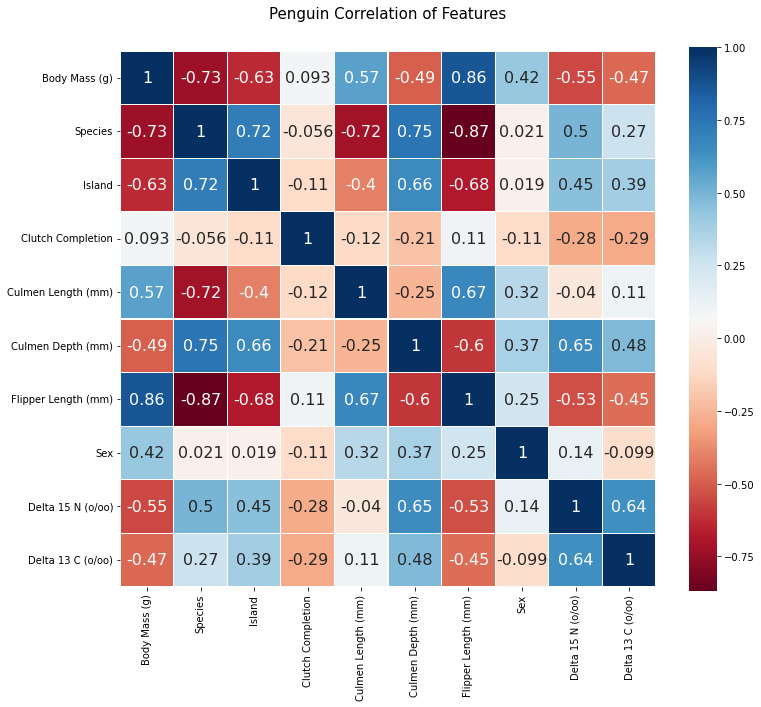

In [19]:
heatmap_data = df_train[['Body Mass (g)','Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Penguin Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

## 결측치 처리

In [20]:
df_train['Sex'].mean()

0.5045045045045045

성별이 반반 정도 인것을 확인하고, 성별과 가장 상관관계가 뚜렷한 Body Mass에 따라서 성별을 임의로 부여합니다

In [21]:
# from the groupby just now
Male_Female_line = (4659.821429 + 4000.909091) / 2
Male_Female_line

4330.36526

In [22]:
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] > Male_Female_line),'Sex'] = 1
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] <= Male_Female_line),'Sex'] = 0

In [23]:
missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


Test set에는 Body Mass에 대한 데이터가 없기 때문에 Flipper Length의 값에 따라서 비어있는 데이터를 채워줍니다.

In [24]:
df_train[['Sex', 'Flipper Length (mm)']].groupby(['Sex'], as_index=False).mean().sort_values(by='Flipper Length (mm)', ascending=False)


,Sex,Flipper Length (mm)
1,1.0,206.929825
0,0.0,199.175439


In [25]:
flipper_length_mean = df_train['Flipper Length (mm)'].mean()
print('flipper_length_mean is ', flipper_length_mean)

flipper_length_mean is  203.05263157894737


In [26]:
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] > flipper_length_mean),'Sex'] = 1
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] <= flipper_length_mean),'Sex'] = 0

In [27]:
train_delta_15_mean = df_train['Delta 15 N (o/oo)'].mean()
print('train_delta_15_mean is ', train_delta_15_mean)
test_delta_15_mean = df_test['Delta 15 N (o/oo)'].mean()
print('test_delta_15_mean is ', test_delta_15_mean)
train_delta_13_mean = df_train['Delta 13 C (o/oo)'].mean()
print('train_delta_13_mean is ', train_delta_13_mean)
test_delta_13_mean = df_test['Delta 13 C (o/oo)'].mean()
print('test_delta_13_mean is ', test_delta_13_mean)

train_delta_15_mean is  8.73763414414414
test_delta_15_mean is  8.731226347031962
train_delta_13_mean is  -25.723051081081067
test_delta_13_mean is  -25.667744681818192


In [28]:
df_train.loc[(df_train['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = train_delta_15_mean
df_test.loc[(df_test['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = test_delta_15_mean

df_train.loc[(df_train['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = train_delta_13_mean
df_test.loc[(df_test['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = test_delta_13_mean

In [29]:
missing_col = check_missing_col(df_train)

결측치가 존재하지 않습니다


In [30]:
missing_col = check_missing_col(df_test)

결측치가 존재하지 않습니다


# One-hot encoding
- 다음으로는 모델의 성능을 조금이나마 올리기 위하여 one-hot encoding을 진행해줍니다.


In [31]:
df_train = pd.get_dummies(df_train, columns=['Species'], prefix='Species')
df_test = pd.get_dummies(df_test, columns=['Species'], prefix='Species')

df_train = pd.get_dummies(df_train, columns=['Island'], prefix='Island')
df_test = pd.get_dummies(df_test, columns=['Island'], prefix='Island')

In [33]:
df_train.head(3)

,id,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_0,Species_1,Species_2,Island_0,Island_1,Island_2
0,0,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550,1,0,0,1,0,0
1,1,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800,0,1,0,0,1,0
2,2,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400,1,0,0,1,0,0


# 필요없는 feature, drop 해줍니다
- from version 1, we can see 'Clutch Completion' doesnt affect much to prediction result

In [34]:
df_train.drop(['id' ,'Clutch Completion'], axis=1, inplace=True)
df_test.drop(['id' ,'Clutch Completion'], axis=1, inplace=True)

# 학습, 예측에 사용할 컬럼
- original is as below
- feature_names = [
 'Species',
 'Island',
 'Clutch Completion',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

In [35]:
feature_names = df_train.columns.tolist()

feature_names

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)',
 'Body Mass (g)',
 'Species_0',
 'Species_1',
 'Species_2',
 'Island_0',
 'Island_1',
 'Island_2']

In [36]:
df_train_feature = df_train.drop('Body Mass (g)', axis=1).values
df_train_feature

array([[ 50. ,  15.3, 220. , ...,   1. ,   0. ,   0. ],
       [ 49.5,  19. , 200. , ...,   0. ,   1. ,   0. ],
       [ 45.1,  14.4, 210. , ...,   1. ,   0. ,   0. ],
       ...,
       [ 43.2,  18.5, 192. , ...,   0. ,   1. ,   0. ],
       [ 46.9,  16.6, 192. , ...,   0. ,   1. ,   0. ],
       [ 50.8,  17.3, 228. , ...,   1. ,   0. ,   0. ]])

# 정답값 (예측해야 될 값)

In [37]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
#  Body Mass (g)는 label입니다
df_train_label = df_train['Body Mass (g)'].values
df_train_label 

array([5550, 3800, 4400, 4850, 5700, 5250, 4250, 3450, 3475, 4750, 4550,
       3300, 4850, 4700, 4050, 5000, 4400, 3075, 4650, 4250, 3275, 3675,
       4650, 3900, 3525, 3400, 4400, 3250, 3775, 3650, 3750, 3450, 3425,
       3500, 3900, 4750, 5000, 5850, 3600, 4600, 5250, 3550, 3800, 4150,
       3800, 4800, 3400, 4725, 4575, 5500, 4150, 3400, 4700, 3800, 3950,
       5550, 3950, 3600, 3900, 6000, 4950, 4850, 3725, 3775, 4250, 3350,
       5650, 6300, 3400, 5350, 4650, 4700, 4500, 4900, 3500, 5550, 3950,
       3350, 5400, 3550, 3900, 3900, 4500, 4700, 4700, 5550, 3650, 3300,
       3700, 5100, 3550, 4075, 5200, 4150, 5200, 5050, 5800, 3000, 5500,
       4375, 4725, 4450, 3675, 5350, 5000, 4150, 5000, 3650, 4300, 3700,
       4250, 4100, 2700, 5600], dtype=int64)

# 머신러닝 알고리즘 가져오기
1. 의사결정나무 사용하기
1. 랜덤포레스트 사용하기
1. 그라디언트 부스팅 사용하기

## 사용할 알고리즘을 리스트 형태로 만들기
- estimators라는 변수에 DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor를 리스트로 할당해 줍니다.

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  

estimators = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [39]:
# 랜덤서치를 구현하기 전에 for문을 통해 여러 개의 모델을 순회하는 반복문을 구현해 봅니다. 
# result 에는 각 모델의 결과값을 저장하고
# results 에 각 모델에서 나온 result 값을 모아줍니다.

results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

# 데이터 프레임 형태로 변환해 보면 모델별 결과값을 데이터프레임에 추가해서 보면 값을 비교해 볼 수 있을거 같습니다.
pd.DataFrame(results)
#create a table to tabulate the performance of the model's estimators

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


##  랜덤한 파라메터 값 리스트로 구현하기
* RandomizedSearchCV 에 사용할 param_distributions 값을 만들어 주세요.
* max_depth 값을 int 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어 주세요.
* max_features 값을 float 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어 주세요.

In [40]:
def make_params_Regression():

    max_depth = np.random.randint(10, 30, 10) # using the number created randomly, and set as max_depth's value
    max_features = np.random.uniform(0.5, 1.0, 10) #same, but is based on gaussian distribution

    param_distributions = {"max_depth": max_depth, "max_features": max_features }

    return param_distributions

# 구현한 함수의 결과 값을 param_distributions 변수에 할당합니다.
param_distributions = make_params_Regression()
param_distributions

{'max_depth': array([22, 11, 19, 17, 29, 27, 26, 18, 18, 23]),
 'max_features': array([0.80527227, 0.89684087, 0.60262936, 0.92933028, 0.79523927,
        0.82322248, 0.59325621, 0.58930569, 0.6931693 , 0.57943613])}

## RandomizedSearchCV 구현하기
* RandomizedSearchCV 를 정의하기. (cv값은 3개)
* cv값은 3개 이상으로 구현하면 조각이 너무 많아서 오래 걸릴 수 있습니다. 
* cv값을 3개로 구현했을 때 너무 오래 걸리지 않는다면 조각의 수를 늘려주셔도 됩니다.
* n_iter를 5로 설정하고 cv를 3으로 설정하면 하나의 모델을 학습할 때 15번의 fit을 하게 됩니다.
* n_iter의 값을 많이 설정할 수록 더 많은 파라메터를 테스트할 수 있습니다.
* 또, n_iter의 값을 더 크게 설정한다면 파라메터의 갯수도 그 만큼 늘려주어야 많은 파라메터 중 성능이 좋은 파라메터를 찾을 수 있습니다.

In [41]:
# RandomizedSearchCV 를 통해 위에서 정의한 모델과 해당 모델의 최적의 파라메터값을 찾아봅니다.
# 시간이 너무 오래 걸린다면 google colaboratory 를 통해 실습하시는 것을 권장드립니다.

from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []

    param_distributions = make_params_Regression()

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=5, # 5
        scoring=None,
        n_jobs=-1,
        cv=3, # 3이상, 다른 값해 봐도 됩니다
        verbose=1, 
        random_state=42)

    regressor.fit(df_train_feature, df_train_label)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

#RandomizedSearchCV just saying we randomly pick sample to do cross validation
#10-fold Crossvalidation is do 10 times cross validation
#adjust cv to adjust how much cross validation we want
#cv is one of the sampling, see evernote seach cross validation
# was 15 fits

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


## 결과를 데이터프레임 형태로 만들기

In [42]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv = df_cv.sort_values("score", ascending=False)
df_cv

#the best estimator is placed at index=0  which is random forest regressor
# 0.820234

,model,params,estimator,score,cv_result
1,RandomForestRegressor,"{'max_features': 0.9134271251062083, 'max_dept...","(DecisionTreeRegressor(max_depth=27, max_featu...",0.811339,"{'mean_fit_time': [0.0903330643971761, 0.08733..."
2,GradientBoostingRegressor,"{'max_features': 0.6408214130486363, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.783839,"{'mean_fit_time': [0.03399658203125, 0.0346638..."
0,DecisionTreeRegressor,"{'max_features': 0.9265204436341244, 'max_dept...","DecisionTreeRegressor(max_depth=24, max_featur...",0.683350,"{'mean_fit_time': [0.0016658306121826172, 0.00..."


## 가장 좋은 성능을 내는 estimator 찾기

In [43]:
best_estimator = df_cv.iloc[0]["estimator"]
best_estimator

#from previous line, best estimator is at index = 0

RandomForestRegressor(max_depth=27, max_features=0.9134271251062083,
                      random_state=42)

In [44]:
pd.DataFrame(df_cv.iloc[0]["cv_result"])

#mean_test_score is the mean of score of each cross validation (every split of the data to train and test de set)
#from rank_test_score, we see that param_max_depth=19, can get high score (we want good result in test!)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.090333,0.007040,0.005666,0.000471,0.913427,27,"{'max_features': 0.9134271251062083, 'max_dept...",0.784504,0.813343,0.836170,0.811339,0.021140,1
1,0.087334,0.001886,0.007000,0.001415,0.913427,23,"{'max_features': 0.9134271251062083, 'max_dept...",0.784504,0.813343,0.836170,0.811339,0.021140,1
2,0.080001,0.000817,0.005000,0.000001,0.886584,25,"{'max_features': 0.8865844034512015, 'max_dept...",0.784504,0.813343,0.836170,0.811339,0.021140,1
3,0.117334,0.001248,0.007333,0.000472,0.501705,19,"{'max_features': 0.5017045808131488, 'max_dept...",0.777722,0.820237,0.825014,0.807658,0.021257,5
4,0.119666,0.000472,0.009668,0.000471,0.881807,19,"{'max_features': 0.8818068852386907, 'max_dept...",0.784504,0.813343,0.836170,0.811339,0.021140,1


# 학습(훈련)
* (X_train)와 정답(y_train)을 활용하고 학습하는 과정

In [45]:
best_estimator.fit(df_train_feature, df_train_label)

#1 max_features=0.6684454463573148
#2  max_features=0.726572705015234
#3  max_features=0.6139798363629593,
#4 now max_features=0.9134271251062083

RandomForestRegressor(max_depth=27, max_features=0.9134271251062083,
                      random_state=42)

# Cross validation 으로 학습 세트의 오차 측정하기

In [47]:
# train set와 valid set를 나눠 cross validation으로 train set으로 학습한 모델을 검증합니다.
# cv=5 , 5 cross validation
# test 점수를 예측하기 전에 
from sklearn.model_selection import cross_val_predict

df_train_CV_predict = cross_val_predict(best_estimator,df_train_feature,df_train_label, cv=5, verbose=1, n_jobs=-1)
df_train_CV_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


array([5633.5 , 3832.75, 4773.  , 4964.5 , 5603.5 ])

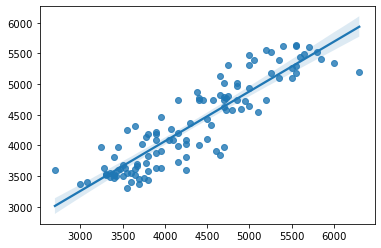

In [48]:
# regplot 으로 결과 값을 비교합니다.
# 회귀선에서 멀리 떨어질 수록 실제값과 예측값의 차이가 많이 납니다.
# 회귀선에 가까울수록 실제값과 예측값의 차이가 작습니다.
sns.regplot(df_train_label, df_train_CV_predict)

In [50]:
# r2_score 를 구합니다. 1에 가까울 수록 정확도가 높습니다.
# 0.75 이상의 값이 나오는지 확인합니다.

from sklearn.metrics import r2_score

r2_score(df_train_label, df_train_CV_predict)

# r2 score is the correlation score
# if get 1.0 is the best, means the closest 
#1 0.8171223314134943
#2 0.7964199546886309
#3 0.7965037800487658
# now 0.8021713873225856

0.8021713873225856

# RMSE

In [51]:
# 대회 규칙의 평가 산식 함수를 그대로 사용합니다.
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

In [52]:
# 실제 정답 값을 준비합니다.
real_answer = df_train_label.copy() # change here

# 정답과 예측 값을 함수에 넣어 결과를 확인합니다.
error = RMSE(real_answer,  df_train_CV_predict)

print(f"이 방정식의 평균 에러는 {error:.2f} 입니다.")
#1 344.19
#2 344.61
#3 344.54
#4 346.19 

이 방정식의 평균 에러는 346.19 입니다.


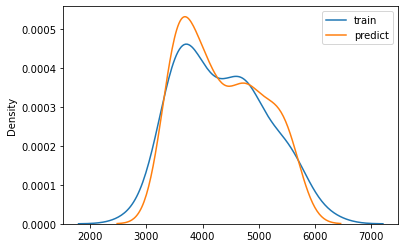

In [53]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(df_train_label, hist=False, label="train")
sns.distplot(df_train_CV_predict, hist=False, label="predict")

plt.legend()
plt.show()

# test_data 예측하기

In [56]:
# test_data 예측하기
df_test_feature = df_test.values
df_test_feature

array([[ 52. ,  20.7, 210. , ...,   0. ,   1. ,   0. ],
       [ 55.9,  17. , 228. , ...,   1. ,   0. ,   0. ],
       [ 38.9,  18.8, 190. , ...,   0. ,   1. ,   0. ],
       ...,
       [ 46.5,  13.5, 210. , ...,   1. ,   0. ,   0. ],
       [ 50.5,  19.6, 201. , ...,   0. ,   1. ,   0. ],
       [ 37.6,  19.1, 194. , ...,   1. ,   0. ,   0. ]])

In [57]:
# 위에서 찾은 best_estimator 를 통해 실제값을 예측합니다.
df_test_predict = best_estimator.predict(df_test_feature)
df_test_predict[:5]

array([4303.25, 5537.25, 3522.5 , 3437.75, 3503.5 ])

In [58]:
# convert array to dataframe
pd.DataFrame(df_test_predict)

,0
0,4303.25
1,5537.25
2,3522.50
3,3437.75
4,3503.50
...,...
223,4115.00
224,4766.00
225,4433.25
226,3726.00


# dacon 대회에 제출하기

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [59]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission.head()

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [60]:
print(submission.shape)
print(df_test_predict.shape)

(228, 2)
(228,)


In [61]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['Body Mass (g)'] = df_test_predict

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,Body Mass (g)
0,0,4303.25
1,1,5537.25
2,2,3522.50
3,3,3437.75
4,4,3503.50
...,...,...
223,223,4115.00
224,224,4766.00
225,225,4433.25
226,226,3726.00


In [62]:
submission.to_csv("./result/submission_20220103_v4.csv", index=False)